<a href="https://colab.research.google.com/github/LSowmyaDonepudi/SalesPrediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("walmart-sales-dataset(1).csv")
df.head()

Saving walmart-sales-dataset(1).csv to walmart-sales-dataset(1).csv


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,State
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106,VA
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106,WA
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,MD
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,WI
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106,MI


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# **EDA**

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['MonthYear_value'] = df['Date'].dt.to_period('M')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,State,Year,Month,Day,MonthYear_value
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,VA,2010,5,2,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,WA,2010,12,2,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,MD,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,WI,2010,2,26,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,MI,2010,5,3,2010-05


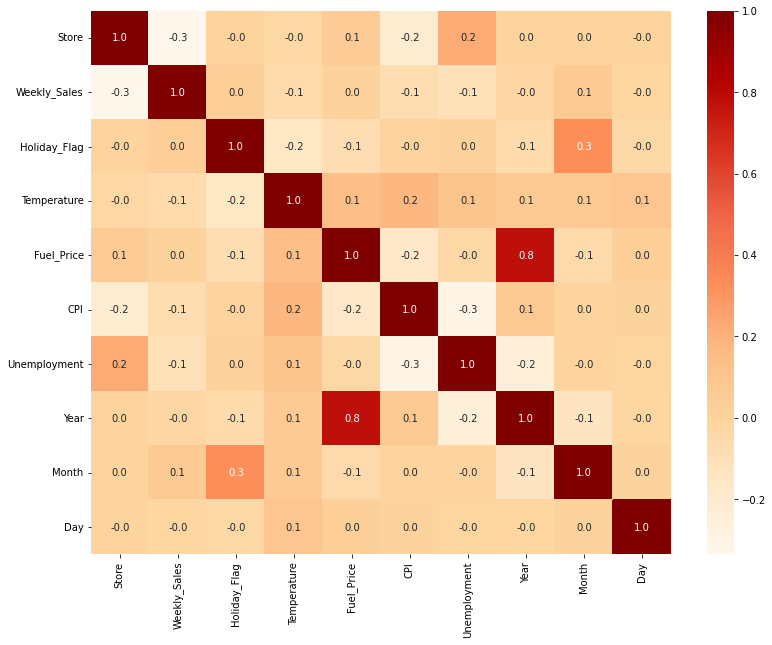

In [ ]:
ag = df.drop(['Date'], axis=1)
ag = ag.corr()
fig, ax = plt.subplots()
fig.set_size_inches(13,10)
ax = sns.heatmap(ag, cmap="OrRd", fmt = '.1f', annot=True)

In [ ]:
df1 = df.groupby(['Store', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)
new_cols_df1 = ['Store_Num', 'Year', 'Annual_Sales']
df1.columns = new_cols_df1
df1.sort_values(by = ['Year', 'Annual_Sales'], ascending = False, inplace  = True)
df1

,Store_Num,Year,Annual_Sales
11,4,2012,92771189.24
59,20,2012,89827709.38
38,13,2012,86707455.02
5,2,2012,81496695.37
29,10,2012,78228616.94
...,...,...,...
6,3,2010,18745419.00
111,38,2010,16587794.52
12,5,2010,14836030.77
129,44,2010,13607519.45


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:

l_labels = ['0','1']

colors = ['darkblue', 'red']


fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Pie(labels = l_labels,
                     values = df['Holiday_Flag'].value_counts(),
                     name = ''))

fig.update_traces(hole = 0.2,
                  hoverinfo = "label+percent+name",
                  textfont_size = 16, marker=dict(colors=colors, line=dict(color='#000000', width=1)))

fig.update_layout(title_text = 'Holiday Flag Distribution')

fig.show()

In [ ]:
fig = px.bar(df1, x = 'Store_Num', y = 'Annual_Sales', color = 'Year', facet_col = 'Year',
             width = 1000, height = 550)

fig.update_layout(title = {"text": "Sales from 2010-2012", "x": 0.5,}, title_font_color = 'blue', showlegend = False,)
fig.update_xaxes(title_text = "Stores", tickmode = 'auto', showgrid = True, categoryorder = "trace")
fig.update_yaxes(title_text = "Annual Sales", showgrid = True)
fig.show()

In [ ]:
fig = px.bar(df1, x="Year", y="Annual_Sales", color="Year",
  animation_frame="Store_Num", animation_group="Annual_Sales", range_y=[0,150000000])
fig.show()

In [ ]:
df_top5_2010 = df.groupby(['Store', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2010 = df_top5_2010[df_top5_2010['Year'] == '2010']
df_top5_2010 = df_top5_2010.head(5)
df_top5_2011 = df.groupby(['Store', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2011 = df_top5_2011[df_top5_2011['Year'] == '2011']
df_top5_2011 = df_top5_2011.head(5)
df_top5_2012 = df.groupby(['Store', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2012 = df_top5_2012[df_top5_2012['Year'] == '2012']
df_top5_2012 = df_top5_2012.head(5)

In [ ]:
df_compareHolidays = df.groupby(['Holiday_Flag'], as_index = False).aggregate(
                                        sum_of_Weekly_Sales = ('Weekly_Sales', 'sum'),
                                        )

df_compareHolidays

,Holiday_Flag,sum_of_Weekly_Sales
0,0,6.231919e+09
1,1,5.052996e+08


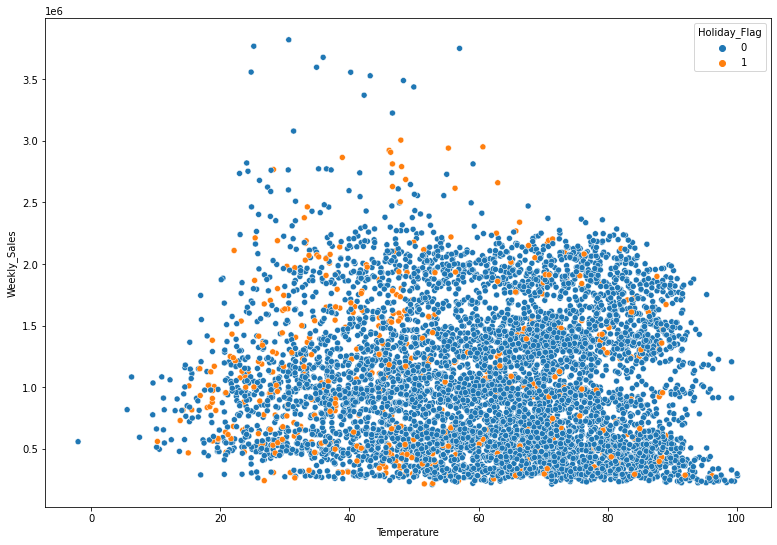

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13,9)
ax = sns.scatterplot(data=df, x="Temperature", y="Weekly_Sales", hue="Holiday_Flag")


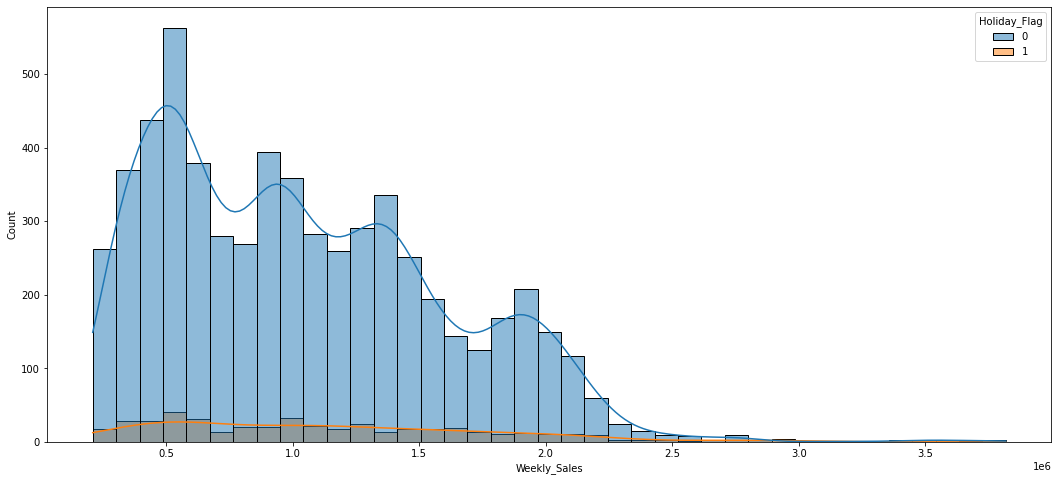

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
sns.histplot(data=df, x="Weekly_Sales", hue="Holiday_Flag", kde=True)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37fab484f0>,
      dtype=object)

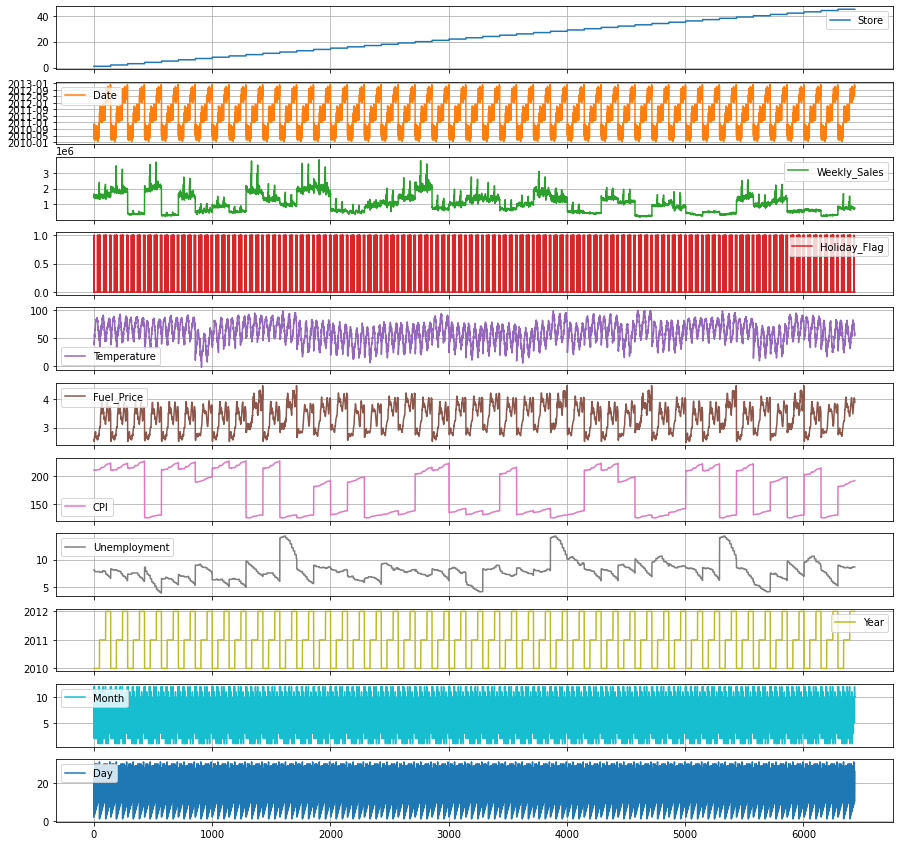

In [ ]:
df.plot(subplots=True, grid=True, figsize=(15,15))

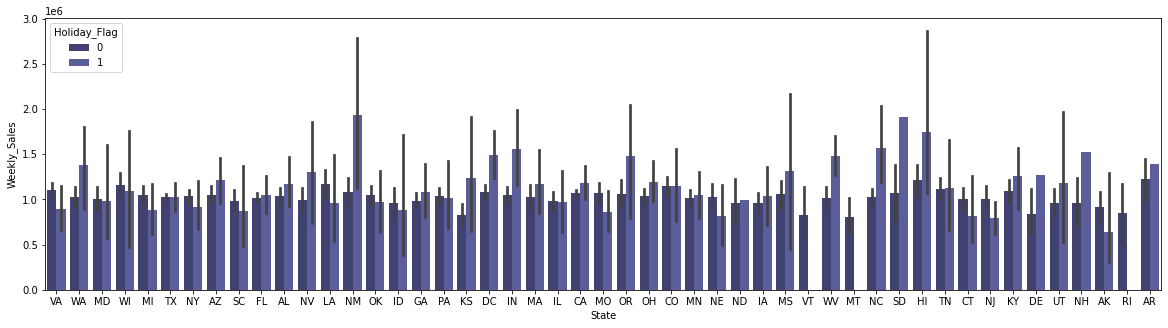

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x="State", y="Weekly_Sales", hue="Holiday_Flag", ax=ax, palette = "tab20b")

In [ ]:
def assign_quarter_category(month):
    if month <= 3:
        return 'Q1'
    elif month >= 4 and month <= 6:
        return 'Q2'
    elif month >=7 and month <= 9:
        return 'Q3'
    elif month >= 10 and month <= 12:
        return 'Q4'
    else:
        return np.nan

In [ ]:
df['Quarter'] = df['Month'].apply(assign_quarter_category)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,State,Year,Month,Day,MonthYear_value,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,VA,2010,5,2,2010-05,Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,WA,2010,12,2,2010-12,Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,MD,2010,2,19,2010-02,Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,WI,2010,2,26,2010-02,Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,MI,2010,5,3,2010-05,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,AL,2012,9,28,2012-09,Q3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,AL,2012,5,10,2012-05,Q2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,CA,2012,12,10,2012-12,Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,TX,2012,10,19,2012-10,Q4


In [ ]:
sales_2011 = df[(df['Year']) == 2011]
sales_2011.drop(['Month', 'Year'], axis='columns', inplace=True)
sales_2011
q_sales = sales_2011.groupby(["Store", "Quarter"]).agg(Quarterwise_Sales=('Weekly_Sales', 'sum'))
q_sales

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Quarterwise_Sales
Store Quarter                   
1     Q1             18049876.61
      Q2             20243682.63
      Q3             21053548.19
      Q4             21574811.40
2     Q1             22138308.04
...                          ...
44    Q4              3979680.12
45    Q1              8888310.73
      Q2             10209083.01
      Q3             10521430.56
      Q4             11516543.58

[180 rows x 1 columns]

In [ ]:
def assign_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']:
        return 'Christmas'
    else:
        return 'Non-Holiday'
holiday_df = df.drop(['Store', 'Year', 'Month'], axis='columns')
holiday_df['Holiday'] = holiday_df['Date'].apply(assign_holiday)
holiday_df

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,State,Day,MonthYear_value,Quarter,Holiday
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,VA,2,2010-05,Q2,Non-Holiday
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,WA,2,2010-12,Q4,Non-Holiday
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,MD,19,2010-02,Q1,Non-Holiday
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,WI,26,2010-02,Q1,Non-Holiday
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,MI,3,2010-05,Q2,Non-Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,AL,28,2012-09,Q3,Non-Holiday
6431,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,AL,10,2012-05,Q2,Non-Holiday
6432,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,CA,10,2012-12,Q4,Non-Holiday
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,TX,19,2012-10,Q4,Non-Holiday


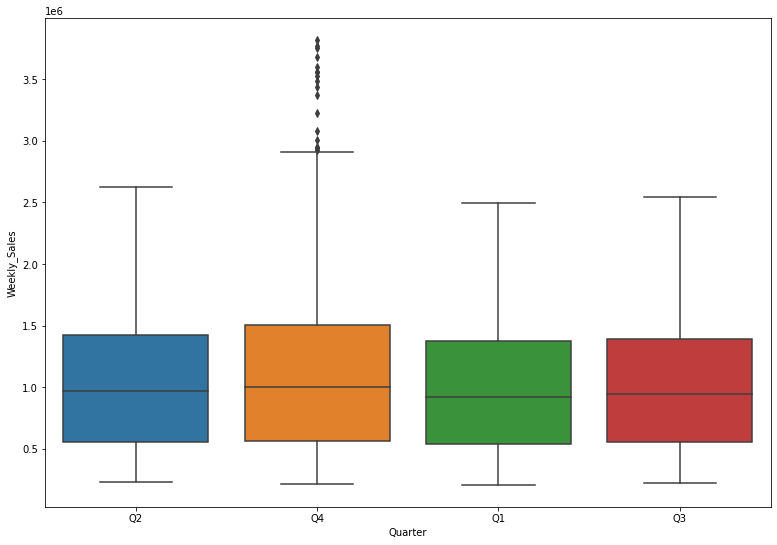

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13,9)
ax = sns.boxplot(x='Quarter', y='Weekly_Sales', data=df)



In [ ]:
pd.pivot_table(holiday_df, index=["Holiday_Flag"], aggfunc={'Weekly_Sales':'sum', 'CPI':np.mean})

,CPI,Weekly_Sales
Holiday_Flag,,
0,171.601725,6.231919e+09
1,171.268092,5.052996e+08


In [ ]:
State_Wise = df.groupby(["State", "Quarter"]).agg(Quarterwise_Sales=('Weekly_Sales', 'sum'))
State_Wise


Quarterwise_Sales
State Quarter                   
AK    Q1              3969534.41
      Q2              4845852.98
      Q3              4713663.21
      Q4              7549835.69
AL    Q1             55547160.46
...                          ...
WI    Q4             16860391.17
WV    Q1             17845089.14
      Q2             30619663.43
      Q3              4958392.98
      Q4             12763441.28

[193 rows x 1 columns]

In [ ]:

unemployment = df.groupby(['Store', 'State']).aggregate({
    'Fuel_Price': 'sum'}).reset_index().sort_values(by = 'Fuel_Price', ascending = False)
new_cols_unemployment = ['Store', 'State', 'Fuel_Price']
unemployment.columns = new_cols_unemployment
unemployment.sort_values(by = ['State', 'Fuel_Price'], ascending = False, inplace  = True)
unemployment





,Store,State,Fuel_Price
562,15,WV,12.044
824,22,WV,11.572
1086,29,WV,11.521
1348,36,WV,11.055
40,1,WV,11.002
...,...,...,...
1460,40,AK,8.938
900,25,AK,3.969
638,18,AK,3.917
1162,32,AK,3.760


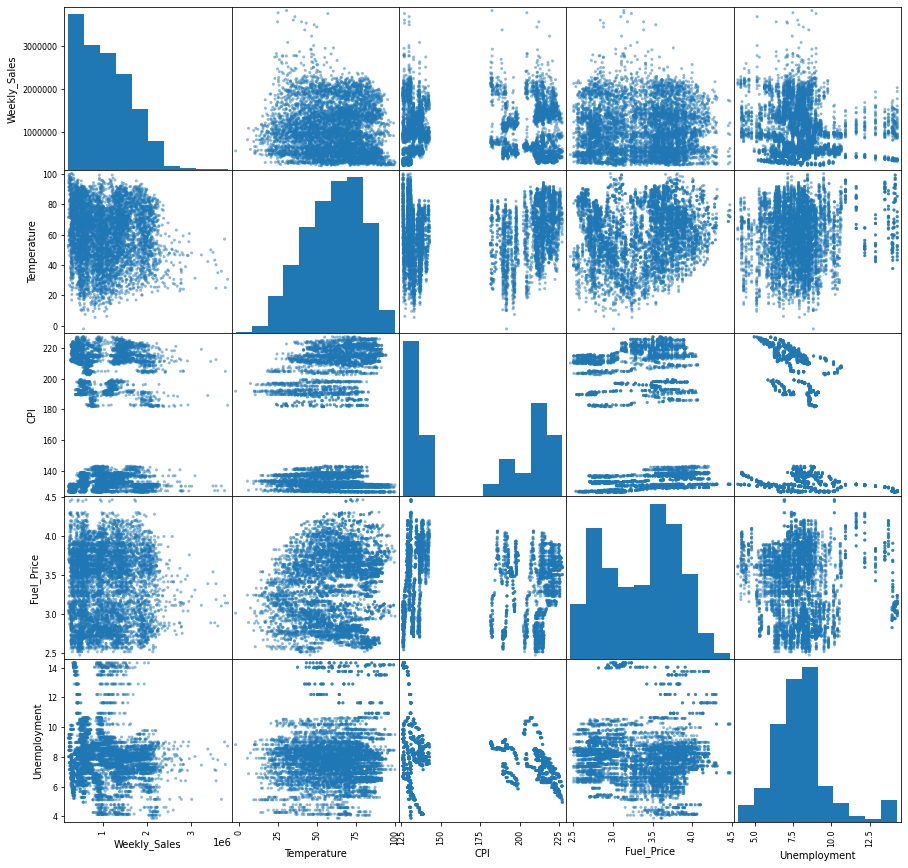

In [ ]:
pd.plotting.scatter_matrix(df[["Weekly_Sales","Temperature","CPI","Fuel_Price","Unemployment"]])
plt.gcf().set_size_inches((15, 15))

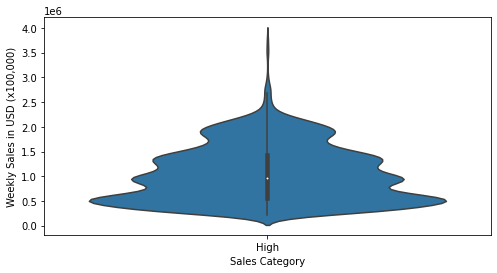

In [ ]:
df['category'] = np.where(df['Weekly_Sales']<10, 'Low',
                          (np.where(df['Weekly_Sales']<=20, 'Moderate', 'High')))

fig, ax = plt.subplots(figsize=(8,4))
sns.violinplot(data=df, x='category', y='Weekly_Sales')
plt.xlabel('Sales Category')
plt.ylabel('Weekly Sales in USD (x100,000)')
plt.show()

# **Data Preparation**

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'State', 'Year', 'Month', 'Day',
       'MonthYear_value', 'Quarter', 'category'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']]
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)
scaler = StandardScaler()
standardized_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
standardized_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# **Random Forest**

* Random Forest Regressor *

Accuracy                 = 95.511 %
Mean Absolute Error      = 65158.33991
Mean Squared Error       = 14230016790.15708
Root Mean Squared Error  = 119289.63404


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



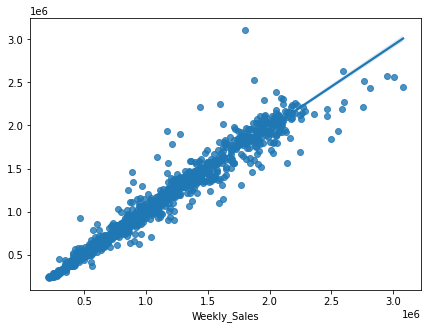

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

rfr_y_pred = rfr.predict(X_test)

R2_rfr = r2_score(y_test, rfr_y_pred)
mae = metrics.mean_absolute_error(y_test, rfr_y_pred)
mse = metrics.mean_squared_error(y_test, rfr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

print('* Random Forest Regressor *\n')

print('Accuracy                 =', R2_rfr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5))
sns.regplot(y_test, rfr_y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score

rfr_scores = cross_val_score(rfr, X_train,y_train, cv=10, scoring='r2')
print(rfr_scores)
print("Mean Score:", rfr_scores.mean()*100,'%')

[0.96867539 0.95568185 0.96073802 0.95837538 0.95354397 0.94549811
 0.93748912 0.95060269 0.94938436 0.94702012]
Mean Score: 95.27009011687625 %


# **Decision Tree**

* Decision Tree Regressor *

Accuracy                 = 93.404 %
Mean Absolute Error      = 77073.72792
Mean Squared Error       = 20907490541.77317
Root Mean Squared Error  = 144594.22721


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



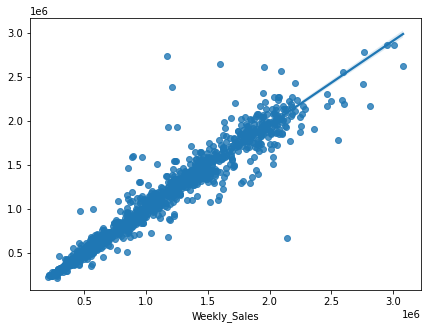

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

dtr_y_pred = dtr.predict(X_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5))
sns.regplot(y_test, dtr_y_pred)

In [ ]:
dtr_scores = cross_val_score(dtr, X_train,y_train, cv=10, scoring='r2')
print(dtr_scores)
print("Mean Score:", dtr_scores.mean()*100,'%')

[0.94064149 0.92040638 0.94675485 0.9168125  0.92924606 0.89519059
 0.91379583 0.945666   0.91940643 0.92245529]
Mean Score: 92.50375429496775 %


# Logistic **Regression**

In [ ]:
from sklearn.preprocessing import StandardScaler

x = df[['Store', 'Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']]
Y = df['Holiday_Flag']
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.30, random_state = 2)
scaler = StandardScaler()
standardized_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
standardized_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train,Y_train)
Y_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred,
                                           pos_label='positive',
                                           average='weighted'))
print("Recall:",metrics.recall_score(Y_test, Y_pred,
                                           pos_label='positive',
                                           average='macro'))

Accuracy: 0.9264629725530813
Precision: 0.8583336395118915
Recall: 0.5


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



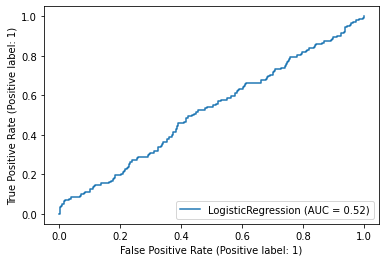

In [ ]:
logreg_disp = RocCurveDisplay.from_estimator(logreg, x_test, Y_test)
plt.show()

# Linear **Regression**

In [ ]:
weights = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

#Generate df to display weights
weights_df = np.array(weights)
variable = np.array(X_train.columns)
model_weights = pd.DataFrame({'variable': variable, 'weight': weights_df}, columns=['variable', 'weight'])
model_weights

,variable,weight
0,Store,-15587.326030
1,Fuel_Price,-2684.599698
2,CPI,-2456.169109
3,Unemployment,-24040.931502
4,Year,976.311716
5,Month,11055.505305
6,Day,-543.131573


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train_1 = X_train[['CPI', 'Fuel_Price']]
X_train_1 = sm.add_constant(X_train_1)
model1 = sm.OLS(y_train, X_train_1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     13.55
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.36e-06
Time:                        02:38:58   Log-Likelihood:                -75471.
No. Observations:                5148   AIC:                         1.509e+05
Df Residuals:                    5145   BIC:                         1.510e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.263e+06   7.31e+04     17.266      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



* Linear Regression *

Train Accuracy Score: 14.907 %
Test Accuracy Score: 12.809000000000001 %
Mean Absolute Error: 438857.699
Mean Squared Error: 276392769609.132
Root Mean Squared Error: 525730.701


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



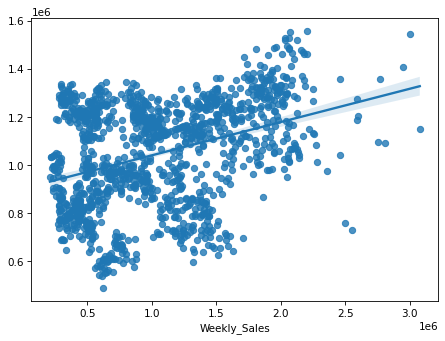

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print('* Linear Regression *\n')

print('Train Accuracy Score:', lr.score(X_train, y_train).round(5)*100, '%')
print('Test Accuracy Score:', r2_score(y_test, lr_y_pred).round(5)*100, '%')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred).round(3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred).round(3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)).round(3))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, lr_y_pred)

In [ ]:
lr_scores = cross_val_score(lr, X_train,y_train, cv=10, scoring='r2')
print(lr_scores)
print("Mean Score:", lr_scores.mean()*100,'%')

[0.16968619 0.10426382 0.17715591 0.19066741 0.17165608 0.10373209
 0.12964349 0.13527995 0.1418675  0.12136534]
Mean Score: 14.45317777760151 %


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

#list for lambda values and each corresponding rmse
RMSE = {}
Lambda = {}

# to check for lambda values in the range [0,1] with a step of 0.01
def drange(start, stop, step):
  while start < stop:
    yield start
    start += step

# implemening LASSO
for i in drange(0, 1, 0.01):
   lasso_regr = Lasso(alpha=i)
   model3 = lasso_regr.fit(X_train, y_train)
   model3_prediction = model3.predict(X_test)
# storing lambda and rmse for incremental of lambda
   Lambda[i] = i
   RMSE[i] = np.sqrt(mean_squared_error(y_test,model3_prediction))

<ipython-input-43-110603b21f19>:17: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.983e+14, tolerance: 1.641e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log2



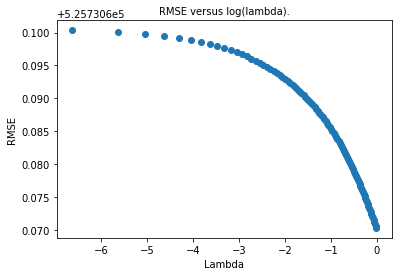

In [ ]:
plot_data = {'Lambda':Lambda.values(), 'RMSE':RMSE.values()}
plt_df = pd.DataFrame(plot_data)
plt.scatter(np.log2(plt_df['Lambda']), plt_df['RMSE'])
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("RMSE versus log(lambda).",fontsize=10)
plt.show()

Coefficients:  [-15528.97805134  59249.96862496  -2310.91926989 -27305.96179293
 -43820.45055851   9980.43343556   -715.93764268]
Variance score: 0.1280882494708041


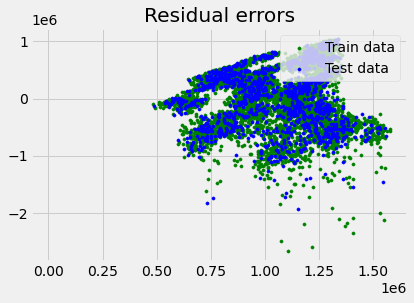

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics



# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()

# **SVC**

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(random_state = 1)
svc_model.fit(x_train,Y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,Y_test)
print("SVM accuracy is :",accuracy_svc)


SVM accuracy is : 0.9264629725530813


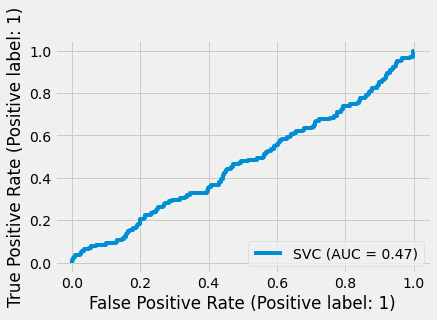

In [ ]:
from sklearn.metrics import RocCurveDisplay


svc_disp = RocCurveDisplay.from_estimator(svc_model, x_test, Y_test)
plt.show()

# Gradient **Boost**

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(x_train, Y_train)

Accuracy: 1.000 (0.000)


GradientBoostingClassifier()

In [ ]:
gb_pred = model.predict(x_test)

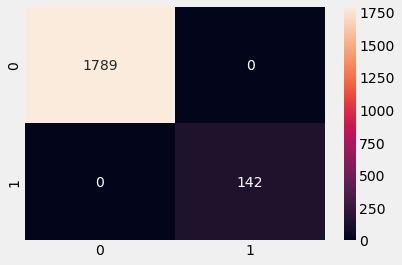

In [ ]:
cm = confusion_matrix(Y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

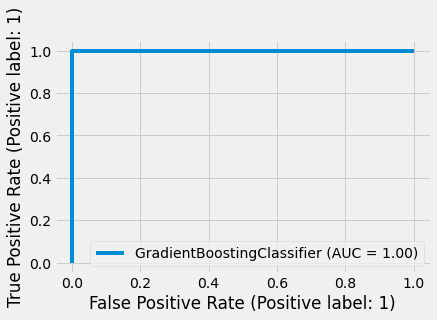

In [ ]:
gradient_boost_disp = RocCurveDisplay.from_estimator(model, x_test, Y_test)
plt.show()